In [4]:
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


/tmp/ipykernel_104136/832079228.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


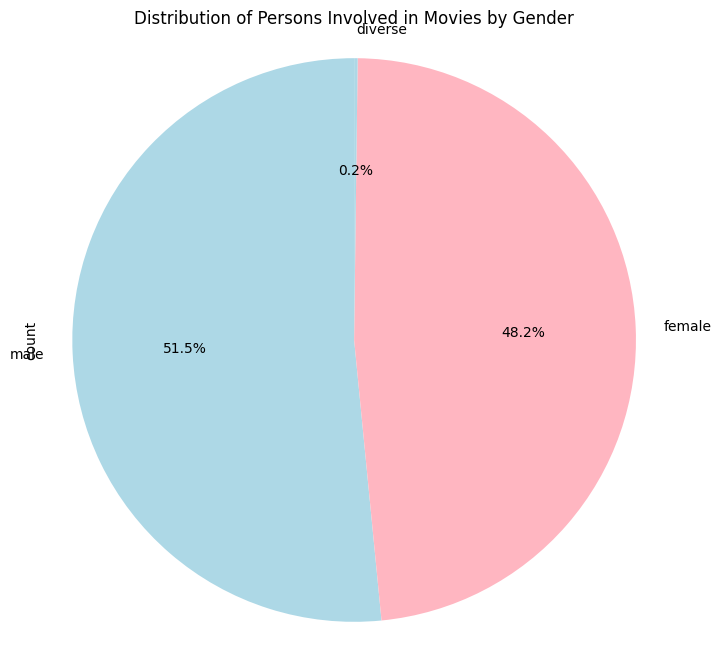

In [11]:
# Database connection parameters
db_params = {
    'dbname': 'movie_db', 
    'user': 'postgres', 
    'password': 'Pasdasdasdasdasdasda', 
    'host': '49.13.1.33',
    'port': '5333'
}

# Connection
conn = psycopg2.connect(**db_params)

# Helper function to query the database
def query_db(sql_query, conn):
    return pd.read_sql_query(sql_query, conn)

# Make a pie chart of persons involved in movies by gender. Do this by querying the database table 'people'
# and using the pandas function 'plot' with the parameter 'kind' set to 'pie'.

# Query the database
df_people = query_db("SELECT * FROM people", conn)

# Make a pie chart
# 1 is female, 2 is male, 3 is diverse, so we map them to strings
gender_counts = df_people['gender'].map({1: 'female', 2: 'male', 3: 'diverse'}).value_counts()

# Make a pie chart
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Distribution of Persons Involved in Movies by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
